### 필요 모듈 및 데이터 로드

In [2]:
import sys
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
dacon_data_path = os.path.join("./data/dacon_data")
sys.path.insert(0, dacon_data_path)

In [4]:
case = pd.read_csv("./Case.csv")
p_info = pd.read_csv("./PatientInfo.csv")
p_route = pd.read_csv("./PatientRoute.csv")
pol = pd.read_csv("./Policy.csv")
reg = pd.read_csv("./Region.csv")
st = pd.read_csv("./SearchTrend.csv")
sf = pd.read_csv("./SeoulFloating.csv")
ta = pd.read_csv("./TimeAge.csv")
time = pd.read_csv("./Time.csv")
tg = pd.read_csv("./TimeGender.csv")
tp = pd.read_csv("./TimeProvince.csv")
wt = pd.read_csv("./Weather.csv")

# utils

In [5]:
def uniform_pdf(x):
    """ Uniform Distribution(균등 분포) 확률 밀도 함수 """
    return 1 if 0 <= x < 1 else 0

In [6]:
def uniform_cdf(x):
    """ 균등 분포 누적 분포 함수 """
    if x < 0:
        return 0
    elif 0 <= x < 1:
        return x
    else:
        return 1

In [7]:
def normal_pdf(x, mu=0.0, sigma=1.0):
    """평균이 mu이고, 표준편차가 sigma인 정규 분포(Normal Distribution)
    확률 밀도 함수
    """
    return math.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (SQRT_TWO_PI * sigma)

In [8]:
def normal_cdf(x, mu=0.0, sigma=1.0):
    """평균이 mu이고, 표준편차가 sigma인
    정규 분포(Normal Distribution)의 누적 분포 함수(Cumulative Distribution Function)
    math.erf() 함수(error function)를 이용해서 구현"""
    return (1 + math.erf((x - mu) / (math.sqrt(2) * sigma))) / 2

In [9]:
def inverse_normal_cdf(p, mu=0.0, sigma=1.0, tolerance=0.00001):
    """누적 확률 p를 알고 있을 때 정규 분포 확률 변수 x = ?"""
    # 표준 정규 분포가 아니라면 표준 정규 분포로 변환
    if mu != 0.0 or sigma != 1.0:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0 # 하한(lower bound)
    high_z = 10.0 # 상한(upper bound)
    while high_z - low_z > tolerance:
        mid_z = (low_z + high_z) / 2.0 # 중간 값
        mid_p = normal_cdf(mid_z) # 중간 값에서의 누적 확률
        if mid_p < p:
            low_z = mid_z
        else:
            high_z = mid_z
    return mid_z

### data EDA

In [97]:
data_list = [case, p_info, p_route, pol, reg, st, sf, ta, time, tg, tp, wt]
data_str_list = ['case', 'p_info', 'p_route', 'pol', 'reg', 'st', 'sf', 'ta', 'time', 'tg', 'tp', 'wt']

In [99]:
def data_shape_print(d_list, d_str_list):
    
    col_list = []
    
    for d_idx in range(len(d_list)):
        print(str(d_idx+1),'_',d_str_list[d_idx], ': ', d_list[d_idx].shape)
        print('columns : ', list(d_list[d_idx].columns))
        print()
        for c_idx in list(d_list[d_idx].columns):
            col_list.append(c_idx)
        
    return col_list
    
col_list = data_shape_print(data_list, data_str_list)

1 _ case :  (112, 8)
columns :  ['case_id', 'province', 'city', 'group', 'infection_case', 'confirmed', 'latitude', 'longitude']

2 _ p_info :  (3388, 18)
columns :  ['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country', 'province', 'city', 'disease', 'infection_case', 'infection_order', 'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date', 'released_date', 'deceased_date', 'state']

3 _ p_route :  (6714, 8)
columns :  ['patient_id', 'global_num', 'date', 'province', 'city', 'type', 'latitude', 'longitude']

4 _ pol :  (48, 7)
columns :  ['policy_id', 'country', 'type', 'gov_policy', 'detail', 'start_date', 'end_date']

5 _ reg :  (244, 12)
columns :  ['code', 'province', 'city', 'latitude', 'longitude', 'elementary_school_count', 'kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count']

6 _ st :  (1581, 5)
columns :  ['date', 'cold', 'flu', 'pneumonia', 'coronavirus']

7 _ sf :  

In [100]:
from collections import Counter

col_d = dict(sorted(dict(Counter(col_list)).items(), key=lambda item: item[1]))
col_d

{'case_id': 1,
 'group': 1,
 'disease': 1,
 'infection_order': 1,
 'infected_by': 1,
 'contact_number': 1,
 'symptom_onset_date': 1,
 'confirmed_date': 1,
 'released_date': 1,
 'deceased_date': 1,
 'state': 1,
 'policy_id': 1,
 'gov_policy': 1,
 'detail': 1,
 'start_date': 1,
 'end_date': 1,
 'elementary_school_count': 1,
 'kindergarten_count': 1,
 'university_count': 1,
 'academy_ratio': 1,
 'elderly_population_ratio': 1,
 'elderly_alone_ratio': 1,
 'nursing_home_count': 1,
 'cold': 1,
 'flu': 1,
 'pneumonia': 1,
 'coronavirus': 1,
 'hour': 1,
 'fp_num': 1,
 'test': 1,
 'negative': 1,
 'avg_temp': 1,
 'min_temp': 1,
 'max_temp': 1,
 'precipitation': 1,
 'max_wind_speed': 1,
 'most_wind_direction': 1,
 'avg_relative_humidity': 1,
 'infection_case': 2,
 'patient_id': 2,
 'global_num': 2,
 'birth_year': 2,
 'age': 2,
 'country': 2,
 'type': 2,
 'code': 2,
 'released': 2,
 'latitude': 3,
 'longitude': 3,
 'sex': 3,
 'time': 4,
 'deceased': 4,
 'city': 5,
 'confirmed': 5,
 'province': 7,
 

### 사용할 데이터 추출

- 그룹화 할 수 있는 데이터(mapper?)
    + date
    + location(city, province)    

In [106]:
# 확진자 중 기저질환 보유 여부
_per = float(list(p_info.disease.value_counts())[0]/len(p_info))
print("percentge : %s%%"%round(_per*100,2))

percentge : 0.53%


In [107]:
# util
def group_cals_func(df, group_col, target_col, agg):
    
    grouped = df.groupby(group_col)
    
    if agg == 'mean':
        return grouped[target_col].mean().sort_values(ascending=False)
    elif agg == 'sum':
        return grouped[target_col].sum().sort_values(ascending=False)

In [108]:
# 감염 케이스 별 확진자 수 
group_cals_func(case, 'infection_case', 'confirmed', 'mean')

infection_case
Shincheonji Church                       347.466667
Second Mi-Ju Hospital                    196.000000
Hansarang Convalescent Hospital          128.000000
gym facility in Cheonan                  103.000000
Daesil Convalescent Hospital             100.000000
contact with patient                      78.125000
River of Grace Community Church           72.000000
Bonghwa Pureun Nursing Home               68.000000
Gyeongsan Seorin Nursing Home             66.000000
etc                                       60.588235
Guro-gu Call Center                       55.333333
Pilgrimage to Israel                      49.000000
overseas inflow                           45.705882
Cheongdo Daenam Hospital                  41.000000
Yechun-gun                                40.000000
Fatima Hospital                           37.000000
Milal Shelter                             36.000000
Ministry of Oceans and Fisheries          30.000000
Uijeongbu St. Mary’s Hospital             30.0000

In [109]:
province_code_mapper = dict(zip(wt.code, wt.province))
province_code_mapper

{10000: 'Seoul',
 11000: 'Busan',
 12000: 'Daegu',
 13000: 'Gwangju',
 14000: 'Incheon',
 15000: 'Daejeon',
 16000: 'Ulsan',
 20000: 'Gyeonggi-do',
 30000: 'Gangwon-do',
 40000: 'Chunghceongbuk-do',
 41000: 'Chungcheongnam-do',
 50000: 'Jeollabuk-do',
 51000: 'Jeollanam-do',
 60000: 'Gyeongsangbuk-do',
 61000: 'Gyeongsangnam-do',
 70000: 'Jeju-do'}

### 감염 케이스 중 집단 감염일 확률?

In [111]:
_per = len(case[case['group'] == True])/len(case)*100
print("percentage : %s%%"%round(_per,3))

percentage : 55.357%


### contact number 따른 확률변수?

- 데이터를 수집한다.

- 수집한 데이터가 어떤 확률변수의 표본 데이터라고 가정

- 데이터를 사용하여 해당 확률변수의 확률분포함수의 모양을 결정

- 결정된 확률변수로부터 다음에 생성될 데이터나 데이터 특성을 예측

In [25]:
import scipy.stats as stats
import sympy

In [26]:
_p_info = p_info[['sex','age','province','infection_case','contact_number','symptom_onset_date','confirmed_date','released_date','deceased_date']]
_p_info

,sex,age,province,infection_case,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date
0,male,50s,Seoul,overseas inflow,75.0,2020-01-22,2020-01-23,2020-02-05,NaN
1,male,30s,Seoul,overseas inflow,31.0,NaN,2020-01-30,2020-03-02,NaN
2,male,50s,Seoul,contact with patient,17.0,NaN,2020-01-30,2020-02-19,NaN
3,male,20s,Seoul,overseas inflow,9.0,2020-01-26,2020-01-30,2020-02-15,NaN
4,female,20s,Seoul,contact with patient,2.0,NaN,2020-01-31,2020-02-24,NaN
...,...,...,...,...,...,...,...,...,...
3383,female,20s,Jeju-do,overseas inflow,14.0,NaN,2020-03-29,NaN,NaN
3384,female,20s,Jeju-do,overseas inflow,18.0,NaN,2020-04-03,NaN,NaN
3385,male,30s,Jeju-do,contact with patient,5.0,NaN,2020-04-03,NaN,NaN
3386,female,20s,Jeju-do,overseas inflow,9.0,NaN,2020-04-03,NaN,NaN


In [27]:
case.infection_case

0                Guro-gu Call Center
1                      Dongan Church
2              Manmin Central Church
3      Eunpyeong St. Mary's Hospital
4                   Seongdong-gu APT
                   ...              
107             contact with patient
108                              etc
109                  overseas inflow
110             contact with patient
111                              etc
Name: infection_case, Length: 112, dtype: object

In [28]:
p_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [29]:
p_info.infection_case.value_counts()

contact with patient                     968
overseas inflow                          604
etc                                      572
Guro-gu Call Center                      112
Shincheonji Church                       107
Onchun Church                             33
Bonghwa Pureun Nursing Home               31
gym facility in Cheonan                   30
Ministry of Oceans and Fisheries          28
Cheongdo Daenam Hospital                  21
Dongan Church                             17
Eunpyeong St. Mary's Hospital             16
Gyeongsan Seorin Nursing Home             15
Seongdong-gu APT                          13
Gyeongsan Jeil Silver Town                12
Milal Shelter                             11
Gyeongsan Cham Joeun Community Center     10
Geochang Church                            6
gym facility in Sejong                     4
Changnyeong Coin Karaoke                   4
Suyeong-gu Kindergarten                    3
Pilgrimage to Israel                       2
River of G

In [30]:
# 연령대 별 감염 수
age_infect_cnt_dict = dict(zip(p_info.age.value_counts().index, p_info.age.value_counts().values)) 
age_infect_cnt_dict

{'20s': 802,
 '50s': 597,
 '40s': 455,
 '30s': 438,
 '60s': 401,
 '70s': 204,
 '80s': 156,
 '10s': 150,
 '0s': 55,
 '90s': 45,
 '100s': 1}

In [121]:
# 연령대별 감염률
age_infect_rate_dict = {}
for k,v in age_infect_cnt_dict.items():
    age_infect_rate_dict[k] = v/sum([v for k,v in age_infect_cnt_dict.items()])    

age_infect_rate_dict

{'20s': 0.23671782762691854,
 '50s': 0.17621015348288074,
 '40s': 0.13429752066115702,
 '30s': 0.1292798110979929,
 '60s': 0.11835891381345927,
 '70s': 0.0602125147579693,
 '80s': 0.04604486422668241,
 '10s': 0.04427390791027155,
 '0s': 0.016233766233766232,
 '90s': 0.013282172373081463,
 '100s': 0.00029515938606847696}

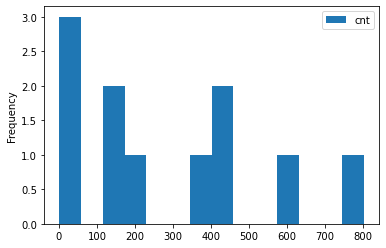

In [122]:
age_infect_cnt_df = pd.DataFrame(list(age_infect_cnt_dict.items()), columns=['age', 'cnt'])
age_infect_cnt_df.plot.hist(bins=14)

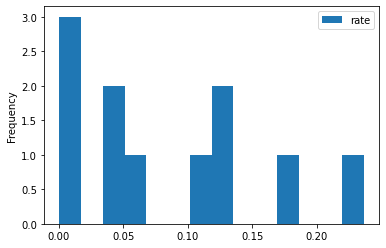

In [123]:
age_infect_rate_df = pd.DataFrame(list(age_infect_rate_dict.items()), columns=['age', 'rate'])
age_infect_rate_df.plot.hist(bins=14)

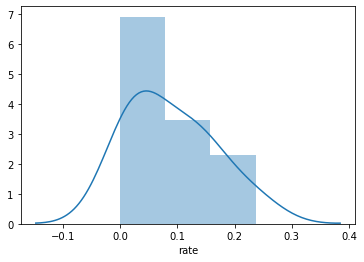

In [124]:
sns.distplot(age_infect_rate_df['rate'])

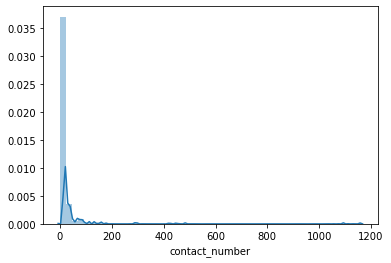

In [125]:
sns.distplot(p_info['contact_number'])

In [126]:
p_info['age_rate'] = p_info['age'].map(age_infect_rate_dict)
p_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,age_rate
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,0.176210
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,0.129280
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,0.176210
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,0.236718
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,0.236718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated,0.236718
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated,0.236718
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated,0.129280
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated,0.236718


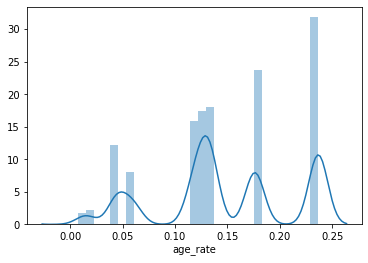

In [127]:
# 연령대에 따른 확률분포 도식화?
sns.distplot(p_info['age_rate'])

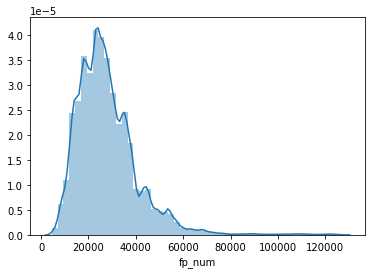

In [132]:
# 유동 인구수
sns.distplot(sf['fp_num'])

In [134]:
import seaborn as sns
print(sp.stats.describe(x))

DescribeResult(nobs=432000, minmax=(4480, 127640), mean=27860.034884259258, variance=172208888.73579407, skewness=1.9056691047057897, kurtosis=7.6358041476710845)


In [135]:
print(x.describe())

count    432000.000000
mean      27860.034884
std       13122.838441
min        4480.000000
25%       18940.000000
50%       25690.000000
75%       34000.000000
max      127640.000000
Name: fp_num, dtype: float64


## 기댓값

- 확률밀도함수나 확률분포함수는 확률변수의 전체적인 성격을 설명하는데, 때로 우리는 몇 개의 수치로 확률분포의 성질을 요약하고자 하기도 함
- 이러한 성질을 요약하는 수치들 중 하나로 변수의 expectation을 생각해보자


In [136]:
age_infect_rate_dict

{'20s': 0.23671782762691854,
 '50s': 0.17621015348288074,
 '40s': 0.13429752066115702,
 '30s': 0.1292798110979929,
 '60s': 0.11835891381345927,
 '70s': 0.0602125147579693,
 '80s': 0.04604486422668241,
 '10s': 0.04427390791027155,
 '0s': 0.016233766233766232,
 '90s': 0.013282172373081463,
 '100s': 0.00029515938606847696}

In [137]:
len(age_infect_rate_dict)

11

In [138]:
# 미성년 (0s or 10s)
# 청장년 (20s ~ 50s)
# 노년 (60s ~ 100s)

In [139]:
# 10명을 임의로 선정했을 때 미성년일 확률?

a = list(age_infect_rate_dict.keys())

In [140]:
# 임의로 두 명을 뽑았을 때 나올 수 있는 모든 가정의 수
# p = itertools.permutations(a, 2)  # 순열

b = itertools.combinations(a,2) # 조합
len(list(itertools.combinations(a,2)))

55

In [143]:
age_infect_rate_dict

{'20s': 0.23671782762691854,
 '50s': 0.17621015348288074,
 '40s': 0.13429752066115702,
 '30s': 0.1292798110979929,
 '60s': 0.11835891381345927,
 '70s': 0.0602125147579693,
 '80s': 0.04604486422668241,
 '10s': 0.04427390791027155,
 '0s': 0.016233766233766232,
 '90s': 0.013282172373081463,
 '100s': 0.00029515938606847696}

In [144]:
# 두 명을 뽑았을때 미성년이 나오는 모든 경우의 수
len(d) + len(a)

121

In [145]:
# debug 용 function
def permutations_with_replacement(data, n=2):
    _list = [data]*n
    return list(itertools.product(*_list))

In [146]:
num_of_cases = permutations_with_replacement(a,2)

In [147]:
num_of_cases

[('20s', '20s'),
 ('20s', '50s'),
 ('20s', '40s'),
 ('20s', '30s'),
 ('20s', '60s'),
 ('20s', '70s'),
 ('20s', '80s'),
 ('20s', '10s'),
 ('20s', '0s'),
 ('20s', '90s'),
 ('20s', '100s'),
 ('50s', '20s'),
 ('50s', '50s'),
 ('50s', '40s'),
 ('50s', '30s'),
 ('50s', '60s'),
 ('50s', '70s'),
 ('50s', '80s'),
 ('50s', '10s'),
 ('50s', '0s'),
 ('50s', '90s'),
 ('50s', '100s'),
 ('40s', '20s'),
 ('40s', '50s'),
 ('40s', '40s'),
 ('40s', '30s'),
 ('40s', '60s'),
 ('40s', '70s'),
 ('40s', '80s'),
 ('40s', '10s'),
 ('40s', '0s'),
 ('40s', '90s'),
 ('40s', '100s'),
 ('30s', '20s'),
 ('30s', '50s'),
 ('30s', '40s'),
 ('30s', '30s'),
 ('30s', '60s'),
 ('30s', '70s'),
 ('30s', '80s'),
 ('30s', '10s'),
 ('30s', '0s'),
 ('30s', '90s'),
 ('30s', '100s'),
 ('60s', '20s'),
 ('60s', '50s'),
 ('60s', '40s'),
 ('60s', '30s'),
 ('60s', '60s'),
 ('60s', '70s'),
 ('60s', '80s'),
 ('60s', '10s'),
 ('60s', '0s'),
 ('60s', '90s'),
 ('60s', '100s'),
 ('70s', '20s'),
 ('70s', '50s'),
 ('70s', '40s'),
 ('70s', '30s'

In [148]:
len(num_of_cases)

121

In [173]:
# 미성년일 확률
prob_of_minor = age_infect_rate_dict['0s']+age_infect_rate_dict['10s']
print('Probability of minor : ', prob_of_minor)

# 성년일 확률
prob_of_adult = 1-(prob_of_minor)
print('Probability of adult : ', prob_of_adult)

Probability of minor :  0.062046004842615014
Probability of adult :  0.937953995157385


#### 관심있는 변수 -> 두 명을 추출했을 때, 추출한 인원 중 한 명 이상이 미성년일 확률

- P(X=0) = 0.003849706716929806
    + 임의의 두 명이 모두 미성년인 경우
    
    
- P(X=1) = 0.00002964048361274893
    + 임의의 두 명 중 한 명만 미성년인 경우
    
    
- P(X=2) = 0.9923154068079466
    + 임의의 두 명이 모두 성인인 경우

In [175]:
# P(X=2)
x_0 = prob_of_minor**2
print(x_0)

# P(X=1) 
x_1 = 2*(x_0**2)
print(x_1)

# P(X=1) 
x_2 = (1-x_0)**2
print(x_2)

0.003849706716929806
2.964048361274893e-05
0.9923154068079466


In [180]:
# x(추출한 인원 중 한 명 이상이 미성년)의 기대값
# E(X) = x_2*0 + x_1*1 + x_1*1 + x_0*2
e = x_2*0 + x_1*1 + x_1*1 + x_0*2
e

# 이거 맞나??

0.00775869440108511

In [181]:
# x(추출한 인원 중 한 명 이상이 성년)의 기대값
# E(X) = x_2*0 + x_1*1 + x_1*1 + x_0*2
e2 = x_2*2 + x_1*1 + x_1*1 + x_0*0
e2

1.9846900945831185

In [189]:
# probabilily mass function
rand_var_dict = {'x_0': x_0, 'x_1':x_1,'x_2':x_2}

In [190]:
rand_var_dict

{'x_0': 0.003849706716929806,
 'x_1': 2.964048361274893e-05,
 'x_2': 0.9923154068079466}

In [191]:
_k = [k for k,v in rand_var_dict.items()]
_v = [v for k,v in rand_var_dict.items()]

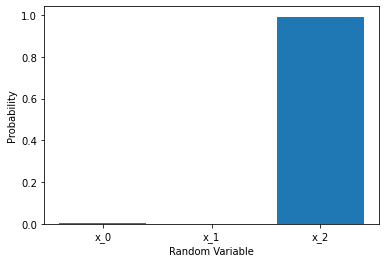

In [193]:
plt.bar(_k, _v)
plt.ylabel("Probability")
plt.xlabel("Random Variable")
plt.show()
plt.close()